In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
data = data.drop_duplicates()

In [5]:
essential_columns = ['track_name', 'track_id', 'artists', 'danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']
data = data.dropna(subset = essential_columns)

In [6]:
data = data.reset_index(drop = True)
data = data.drop(columns = ['Unnamed: 0'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

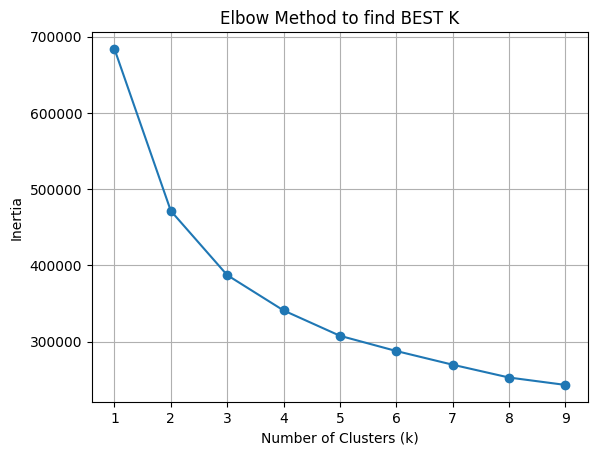

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

scaler = StandardScaler()
selected_columns = data[features]
scaled_features = scaler.fit_transform(selected_columns)

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans_sklearn = KMeans(n_clusters = k, random_state = 42)
    kmeans_sklearn.fit(scaled_features)
    inertia.append(kmeans_sklearn.inertia_)

plt.plot(k_range, inertia, marker = 'o')
plt.title("Elbow Method to find BEST K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

CHOOSING WHICH CLUSTERING ALGORITHM WOULD WORK THE BEST

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [10]:
X, _ = make_blobs(n_samples = 500, centers = 4, cluster_std = 1.0, random_state = 42)
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [11]:
clustering_algos = {
    'KMeans' : KMeans(n_clusters = 4, random_state = 42),
    'DBSCAN' : DBSCAN(eps = 0.5, min_samples = 5),
    'Agglomerative' : AgglomerativeClustering(n_clusters = 4),
    'MeanShift' : MeanShift(),
    'Spectral' : SpectralClustering(n_clusters = 4, assign_labels = 'kmeans_sklearn', random_state = 42, affinity = 'nearest_neighbors')
}

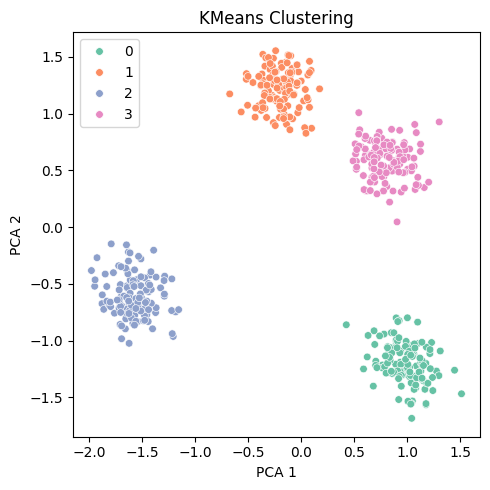

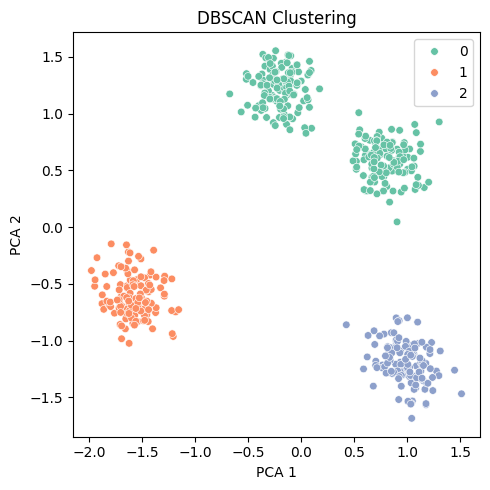

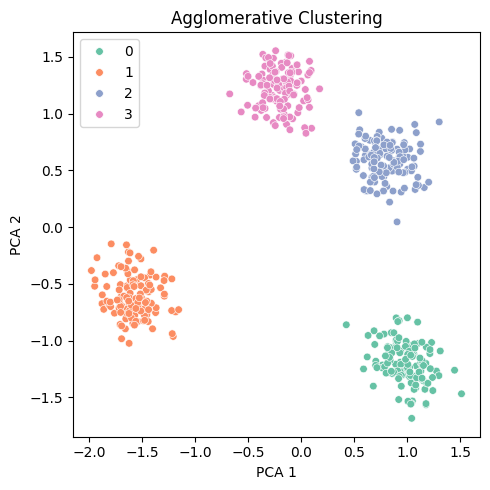

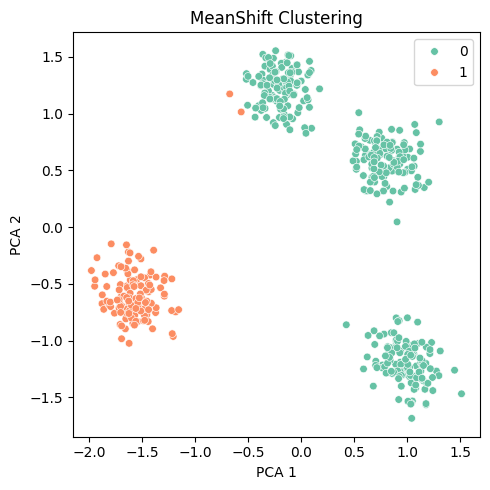

Failed for Spectral: The 'assign_labels' parameter of SpectralClustering must be a str among {'discretize', 'kmeans', 'cluster_qr'}. Got 'kmeans_sklearn' instead.
Clustering comparison:
KMeans          | Silhouette score: 0.7979 | DB index : 0.2819 | Clusters : 4 
DBSCAN          | Silhouette score: 0.7466 | DB index : 0.3651 | Clusters : 3 
Agglomerative   | Silhouette score: 0.7979 | DB index : 0.2819 | Clusters : 4 
MeanShift       | Silhouette score: 0.5548 | DB index : 0.5923 | Clusters : 2 


In [12]:
results = []

for name, algo in clustering_algos.items():
    try:
        labels = algo.fit_predict(X)
        if np.unique(labels).shape[0] <= 1 or (name == 'DBSCAN' and -1 in labels and len(set(labels)) == 1):
            sihouette = -1
            db_score = float('inf')

        else:
            silhouette = silhouette_score(X, labels)
            db_score = davies_bouldin_score(X, labels)

        results.append({
            'Algorithm' : name,
            'Silhouette score' : round(silhouette, 4),
            'DB Score' : round(db_score, 4),
            'Clusters' : len(set(labels)) - (1 if -1 in labels else 0)
        })

        plt.figure(figsize=(5,5))
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.title(f"{name} Clustering")
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=30)
        plt.tight_layout()
        plt.show()
        
        

    except Exception as e:
        print(f"Failed for {name}: {e}")


print("Clustering comparison:")
for r in results:
    print(f"{r['Algorithm']:15} | Silhouette score: {r['Silhouette score']} | DB index : {r['DB Score']} | Clusters : {r['Clusters']} ")


### USING KMEANS BECAUSE IT RAN WELL. (COULD HAVE ALSO USED AGGLOMERATIVE BUT KMEANS IS BETTER IN THIS CASE).

##### NOW WE CODE OUT KMEANS IN BOTH, NUMPY AND SKLEARN. 

#### NUMPY

In [13]:
def eucledian_distance(a,b):
    return np.sqrt(np.sum(a - b)**2)

def initialize_centroids(X, k):
    np.random.seed(50)
    indices = np.random.choice(X.shape[0], k, replace = False)
    return X[indices]

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distance = [eucledian_distance(x ,c) for c in centroids]
        cluster = np.argmin(distance)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            new_centroids.append(np.random.randn(X.shape[1]))
        else:
            new_centroids.append(cluster_points.mean(axis = 0))
    return np.array(new_centroids)

def kmeans_sklearn_numpy(X, k, max_iters = 500, tol = 1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids, atol = tol):
            break
        else:
            centroids = new_centroids
    return labels, centroids

In [14]:
labels, centroids = kmeans_sklearn_numpy(X_pca, k = 3)

#### SKLEARN

In [15]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters = 3, random_state = 42)
labels_sklearn = kmeans_sklearn.fit_predict(X_pca)
centroids_sklearn = kmeans_sklearn.cluster_centers_

PLOTTING TO SEE THE DIFFERENCE IN BOTH

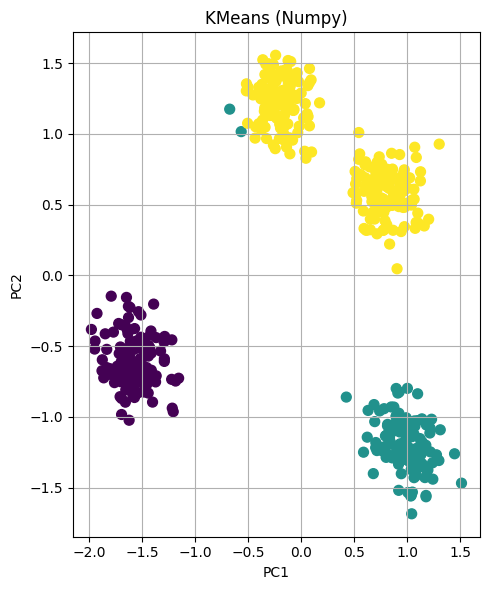

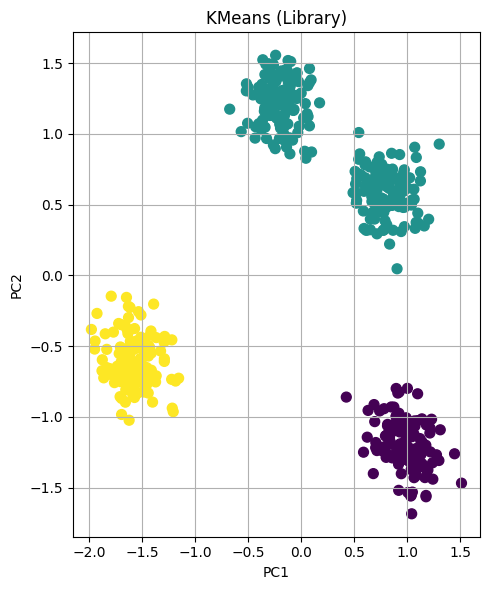

In [16]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(5,6))
    plt.scatter(X[:,0], X[:,1], c = labels, s = 50)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_clusters(X_pca, labels, "KMeans (Numpy)")
plot_clusters(X_pca, labels_sklearn, "KMeans (Library)")

In [17]:
score_numpy = silhouette_score(X_pca, labels)
score_sklearn = silhouette_score(X_pca, labels_sklearn)

print("Silhouette Score (numpy): ", score_numpy)
print("Silhouette Score (sklearn): ", score_sklearn)

Silhouette Score (numpy):  0.7381013294522235
Silhouette Score (sklearn):  0.7466113868280719


In [18]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [19]:
#features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

#labels, centroids = kmeans_sklearn_numpy(data[features].values, k = 3)
#data['clusters'] = labels


In [20]:

scaled_values = StandardScaler().fit_transform(data[features])
data_scaled = data.copy()
data_scaled[features] = scaled_values

In [21]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters = 3, random_state = 42)
kmeans_sklearn.fit(data_scaled[features])
labels_sklearn = kmeans_sklearn.fit_predict(scaled_values)

In [22]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [23]:
data_scaled[features].values

array([[ 0.62923855, -0.71714698,  0.300825  , -0.85019263,  0.92931467,
        -1.14185449],
       [-0.84590813, -1.88997393, -1.78473883,  1.83174449, -0.79868091,
        -1.48970775],
       [-0.74218688, -1.12266681, -0.29328928, -0.31548931, -1.36567947,
        -1.52830252],
       ...,
       [ 0.35841084, -1.24193735, -0.52413489,  1.66032666,  1.0373144 ,
         0.34125863],
       [ 0.11639459, -0.53824118, -0.52294189,  0.19876416, -0.23553949,
         0.46074562],
       [-0.23510521, -0.61377919, -0.38674099,  1.10096324,  0.90231474,
        -1.43269958]], shape=(113999, 6))

In [24]:
data_scaled = data_scaled.select_dtypes(include = ['int64', 'float64'])

In [25]:
print(data_scaled.dtypes)

popularity            int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


In [26]:
def detect_mood(text):
    text = text.lower()
    if "sad" in text:
        return "sad"
    elif "happy" in text or "energetic" in text:
        return "happy"
    elif "calm" in text or "relaxed" in text:
        return "calm"
    elif "angry" in text or "furious" in text:
        return "angry"
    elif "pumped" in text or "motivated" in text:
        return "motivated"
    else:
        return "neutral"

In [27]:
from sklearn.preprocessing import MinMaxScaler
scalerminmax = MinMaxScaler()
data['tempo_scaled'] = scalerminmax.fit_transform(data[['tempo']])

In [28]:
mood_features = {
    "happy": {
        "danceability": (0.7, 1.0),
        "energy": (0.7, 1.0),
        "loudness_db": (-5, -2),
        "acousticness": (0.0, 0.3),
        "valence": (0.7, 1.0),
        "tempo_bpm": (0.6, 1.0)
    },
    "sad": {
        "danceability": (0.0, 0.4),
        "energy": (0.0, 0.4),
        "loudness_db": (-12, -6),
        "acousticness": (0.6, 1.0),
        "valence": (0.0, 0.3),
        "tempo_bpm": (0.0, 0.3)
    },
    "motivated":
    {
        "danceability": (0.6, 0.9),
        "energy": (0.8, 1.0),       
        "loudness_db": (-5, -1),
        "acousticness": (0.0, 0.3),
        "valence": (0.5, 0.9),
        "tempo_bpm": (0.6, 0.9)
    },

    "angry": {
        "danceability": (0.4, 0.7),
        "energy": (0.7, 1.0),
        "loudness_db": (-6, -2),
        "acousticness": (0.0, 0.2),
        "valence": (0.3, 0.6),
        "tempo_bpm": (0.7, 1.0)
    },
    "calm": {
        "danceability": (0.4, 0.6),
        "energy": (0.2, 0.5),
        "loudness_db": (-12, -6),
        "acousticness": (0.6, 1.0),
        "valence": (0.4, 0.6),
        "tempo_bpm": (0.3, 0.6)
    },
    "neutral": {
        "danceability": (0.4, 0.6),
        "energy": (0.4, 0.6),
        "loudness_db": (-8, -5),
        "acousticness": (0.3, 0.6),
        "valence": (0.4, 0.6),
        "tempo": (0.4, 0.6)
    }
}

In [29]:
mood_vectors = {
    "happy" : [0.8, 0.8, -0.5, 0.2, 0.9, 130],
    "sad" : [0.2, 0.3, -12, 0.8, 0.2, 70],
    "motivated" : [0.7, 0.85, -4, 0.1, 0.7, 140],
    "calm" : [0.3, 0.2, -15, 0.9, 0.5, 60],
    "angry" : [0.5, 0.9, -3, 0.1, 0.2, 150],
    "neutral" : [0.5, 0.5, -9, 0.5, 0.5, 100],
}

In [30]:
print(type(kmeans_sklearn))
print(kmeans_sklearn)

<class 'sklearn.cluster._kmeans.KMeans'>
KMeans(n_clusters=3, random_state=42)


In [31]:
data_scaled.shape

(113999, 14)

In [32]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Define the features you're using
# feature_columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

# # Scale the feature data
# scaler = StandardScaler()
# data_features = data[feature_columns]
# data_scaled = scaler.fit_transform(data_features)

# # Fit KMeans model on the scaled features
# kmeans_sklearn = KMeans(n_clusters=5, random_state=42)
# kmeans_sklearn.fit(data_scaled)

# # Store cluster labels in the original dataframe
# data['cluster'] = kmeans_sklearn.labels_

In [33]:
# from sklearn.metrics.pairwise import euclidean_distances

# def recommend_songs(user_input, kmeans_sklearn, scaler, data_original, data_scaled):
#     # Define the same 6 features
#     feature_columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']
    
#     # Detect mood and get its corresponding vector
#     mood = detect_mood(user_input)
#     print(f"Detected mood: {mood}")
    
#     features = mood_vectors[mood]
#     mood_vector = np.array(features).reshape(1, -1)

#     # Scale mood vector using same scaler
#     mood_vector_scaled = scaler.transform(mood_vector)

#     # Predict cluster for mood vector
#     cluster_label = kmeans_sklearn.predict(mood_vector_scaled)[0]

#     # Filter songs in that cluster
#     cluster_indices = data_original['cluster'] == cluster_label
#     cluster_features = data_scaled[cluster_indices]
#     cluster_songs = data_original[cluster_indices]

#     # Calculate Euclidean distances
#     distances = euclidean_distances(cluster_features, mood_vector_scaled).flatten()

#     # Get top 5 closest songs
#     top_indices = distances.argsort()[:5]
#     recommended_songs = cluster_songs.iloc[top_indices]

#     return recommended_songs[['track_name', 'artist_name', 'valence', 'energy', 'danceability']]

In [34]:
# from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# def recommend_songs(user_input, kmeans_sklearn, data_original):
#     # Define the 6 relevant features
#     feature_columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']
    
#     # Extract and scale the features from the dataset
#     data_features = data_original[feature_columns]
#     data_scaled = scaler.fit_transform(data_features)

#     # Detect mood and get its corresponding vector
#     mood = detect_mood(user_input)
#     print(f"Detected mood: {mood}")
    
#     features = mood_vectors[mood]
#     mood_vector = np.array(features).reshape(1, -1)

#     # Scale mood vector with same scaler used on dataset
#     mood_vector_scaled = scaler.transform(mood_vector)

#     # Fit KMeans model on scaled data
#     kmeans_sklearn.fit(data_scaled)
    
#     # Predict cluster for the mood vector
#     cluster_label = kmeans_sklearn.predict(mood_vector_scaled)[0]

#     # Assign clusters to the original dataset
#     data_original['cluster'] = kmeans_sklearn.labels_

#     # Filter songs in the same cluster
#     cluster_indices = data_original['cluster'] == cluster_label
#     cluster_features = data_scaled[cluster_indices]
#     cluster_songs = data_original[cluster_indices]

#     # Calculate distances to mood vector
#     distances = euclidean_distances(cluster_features, mood_vector_scaled).flatten()

#     # Get top 5 closest songs
#     top_indices = distances.argsort()[:5]
#     recommended_songs = cluster_songs.iloc[top_indices]
#     data.set_index(['track_name', 'artists'], inplace = True)

#     return recommended_songs[['track_name', 'artists', 'valence', 'energy', 'danceability']]

In [51]:
# # Define mood vectors beforehand
# mood_vectors = {
#     'happy': [0.8, 0.7, -5.0, 0.1, 0.9, 120],
#     'sad': [0.3, 0.4, -10.0, 0.5, 0.2, 90],
#     'angry': [0.6, 0.9, -3.0, 0.1, 0.4, 130],
#     'relaxed': [0.5, 0.5, -8.0, 0.6, 0.6, 100]
# }

mood_vectors = {
    "happy" : [0.8, 0.8, -0.5, 0.2, 0.9, 130],
    "sad" : [0.2, 0.3, -12, 0.8, 0.2, 70],
    "motivated" : [0.7, 0.85, -4, 0.1, 0.7, 140],
    "calm" : [0.3, 0.2, -15, 0.9, 0.5, 60],
    "angry" : [0.5, 0.9, -3, 0.1, 0.2, 150],
    "neutral" : [0.5, 0.5, -9, 0.5, 0.5, 100],
}

# Your detect_mood function
def detect_mood(text):
    text = text.lower()
    if "sad" in text:
        return "sad"
    elif "happy" in text or "energetic" in text:
        return "happy"
    elif "calm" in text or "relaxed" in text:
        return "calm"
    elif "angry" in text or "furious" in text:
        return "angry"
    elif "pumped" in text or "motivated" in text:
        return "motivated"
    else:
        return "neutral"

In [52]:
# Define your features
feature_columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

# Fit scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[feature_columns])

# Fit KMeans on scaled data
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data_scaled)

# Add cluster labels to dataset (can also be done once and reused)
data['cluster'] = kmeans_model.labels_

In [80]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

def recommend_songs(user_input, kmeans_model, data_original, scaler):
    # Define 6 relevant features
    feature_columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

    # Validate required columns
    required_columns = feature_columns + ['track_name', 'artists']
    for col in required_columns:
        if col not in data_original.columns:
            raise ValueError(f"Missing column: {col} in dataset")

    # Detect mood
    mood = detect_mood(user_input)
    print(f"Detected mood: {mood}")

    # Create mood vector
    features = mood_vectors[mood]
    mood_vector_df = pd.DataFrame([features], columns=feature_columns)

    # Scale mood vector
    mood_vector_scaled = scaler.transform(mood_vector_df)

    # Predict cluster
    cluster_label = kmeans_model.predict(mood_vector_scaled)[0]

    # Copy original data with cluster labels
    data_with_clusters = data_original.copy()
    data_with_clusters['cluster'] = kmeans_model.labels_

    # Filter songs in the same cluster
    cluster_songs = data_with_clusters[data_with_clusters['cluster'] == cluster_label]

    if cluster_songs.empty:
        print("No songs found in the predicted cluster.")
        return pd.DataFrame(columns=['track_name', 'artists'])

    # Scale features of the cluster songs
    cluster_features_scaled = scaler.transform(cluster_songs[feature_columns])

    # Compute distances
    distances = euclidean_distances(cluster_features_scaled, mood_vector_scaled).flatten()

    # Sort by closest distances
    sorted_indices = distances.argsort()

    # Fetch more than needed to handle duplicates
    top_n = 20
    closest_songs = cluster_songs.iloc[sorted_indices[:top_n]]

    # Drop duplicates and select top 10
    unique_recommendations = closest_songs.drop_duplicates(subset=['track_name', 'artists']).head(10)

    # Prepare final result
    results_df = unique_recommendations[['track_name', 'artists']].reset_index(drop=True)
    return results_df

In [85]:
input = "i dont know man i feel motivated at the same time"
recommend_songs(input, kmeans_sklearn, data, scaler)

Detected mood: motivated


,track_name,artists
0,Bøgdafest,BEIST
1,Heavy,Chase & Status;Dizzee Rascal
2,All Around the World (La La La) [Marnik Remix],R3HAB;A Touch Of Class;Marnik
3,Te Vas a Acordar de Mí,Panteon Rococo
4,Princesas,Pereza
5,Amores Dormidos,Edurne
6,Pietro Lombaaadi,Tim Toupet;Lorenz Büffel
7,Kokoroyohou,Eve
8,Boys Just Want to Have Beer,Immer Hansi
9,Sunshine,OneRepublic


In [86]:
import streamlit as st
import random

# Title
st.title("🎧 Mood-Based Song Recommender")

# Text input or mood selection
user_mood = st.text_input("What's your mood right now?", "")

# When user enters mood and hits "Recommend"
if user_mood:
    all_recs = recommend_songs(user_mood)

    # Drop duplicates
    all_recs = all_recs.drop_duplicates(subset='track_id')

    # Randomize and limit to 10 each time
    num_songs_to_show = 10
    final_recommendations = all_recs.sample(n=min(num_songs_to_show, len(all_recs)))

    # Refresh button
    if st.button("🔁 Refresh Recommendations"):
        final_recommendations = all_recs.sample(n=min(num_songs_to_show, len(all_recs)))

    # Display recommendations
    st.subheader("Recommended Tracks 🎶")
    for index, row in final_recommendations.iterrows():
        st.markdown(f"{row['track_name']}** by {row['artists']}")

        # Spotify Embed using track_id
        track_id = row['track_id']
        embed_url = f"https://open.spotify.com/embed/track/{track_id}"
        st.components.v1.html(
            f"""
            <iframe style="border-radius:12px" 
                    src="{embed_url}" 
                    width="100%" height="80" frameBorder="0" 
                    allowfullscreen 
                    allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture" 
                    loading="lazy">
            </iframe>
            """, 
            height=100
        )

2025-08-02 14:57:01.594 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:01.988 
  command:

    streamlit run C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-02 14:57:01.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:01.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:01.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:01.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:01.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:57:02.003 Threa

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(kmeans_sklearn)